In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import keras
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
import shutil

In [2]:
romance= '/content/drive/MyDrive/deeplearning_dataset/Romance'
teaching= '/content/drive/MyDrive/deeplearning_dataset/Teaching-Resources-Education'
cell_data = '/content/drive/MyDrive/deeplearning_dataset'

In [3]:
romance_dir = os.listdir(romance)
teaching_dir = os.listdir(teaching)

print("Number of romance cells", len(romance_dir))
print("Number of teaching cells", len(teaching_dir))

Number of romance cells 358
Number of teaching cells 724


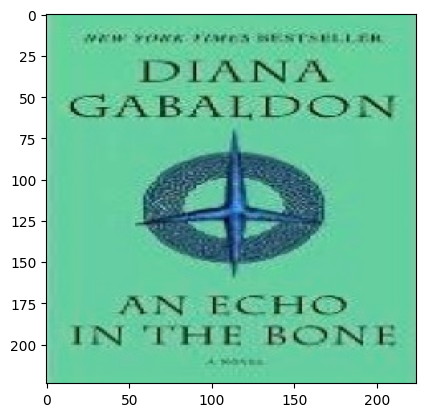

In [21]:
#sample image of romance
import cv2

img_path = os.path.join(romance,romance_dir[32])
img1= cv2.imread(img_path)
plt.imshow(img1)

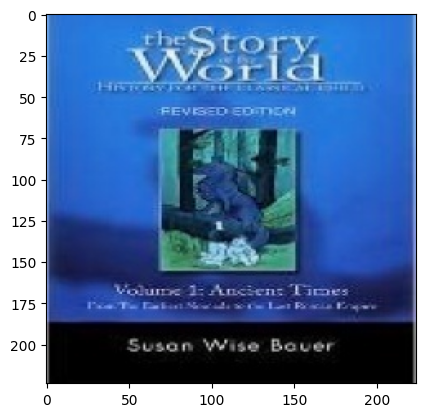

In [20]:
#sample image of teaching
import cv2

img_path = os.path.join(teaching,teaching_dir[50])
img1= cv2.imread(img_path)
plt.imshow(img1)

In [6]:
# Target size for resizing images
target_size = (224, 224)

# Iterate through the images in the dataset directory
for filename in os.listdir(teaching):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        filepath = os.path.join(teaching, filename)
        # Read the image using OpenCV
        img = cv2.imread(filepath)
        # Resize the image
        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
        # Save the resized image, overwrite the original if needed
        cv2.imwrite(filepath, resized_img)

print("Images resized successfully.")

Images resized successfully.


In [7]:
# Target size for resizing images
target_size = (224, 224)

# Iterate through the images in the dataset directory
for filename in os.listdir(romance):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        filepath = os.path.join(romance, filename)
        # Read the image using OpenCV
        img = cv2.imread(filepath)
        # Resize the image
        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
        # Save the resized image, overwrite the original if needed
        cv2.imwrite(filepath, resized_img)

print("Images resized successfully.")

Images resized successfully.


In [8]:
# Define the classes (Romance and teaching resource education)
classes = ['Romance', 'Teaching-Resources-Education']

In [9]:
# Create train and test folders
output_folder="Data_split"

train_folder = os.path.join(output_folder, 'train')
test_folder = os.path.join(output_folder, 'test')
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

In [10]:
for class_name in classes:
    class_folder = os.path.join(cell_data, class_name)

    # List all the files (excluding directories) in the class folder
    images = [file for file in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, file))]

    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create class-specific folders in train and test
    train_class_folder = os.path.join(train_folder, class_name)
    test_class_folder = os.path.join(test_folder, class_name)
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

    # Move images to the respective folders
    for image in train_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(train_class_folder, image)
        shutil.copy(src_path, dest_path)

    for image in test_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(test_class_folder, image)
        shutil.copy(src_path, dest_path)

print("Dataset split and organized into train and test folders.")


Dataset split and organized into train and test folders.


In [11]:
train_path='Data_split/test'
test_path='Data_split/train'

In [12]:
len(train_images)

578

In [13]:
len(test_images)

145

In [14]:
IMAGE_SIZE=(224,224)
BATCH_SIZE=32

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)# Create an instance of the ImageDataGenerator with resizing

train_data = train_generator.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=True,
                                                 subset='training'
                                                )

val_data = train_generator.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=False,
                                                 subset='validation'
                                                 )

test_generator  = ImageDataGenerator(rescale=1./255)

test_data = test_generator.flow_from_directory(test_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",shuffle=False,
                                                 batch_size=BATCH_SIZE)

Found 174 images belonging to 2 classes.
Found 43 images belonging to 2 classes.
Found 863 images belonging to 2 classes.


In [16]:
# Assuming train_data is your training generator
class_names = list(train_data.class_indices.keys())
print("Class Names:", class_names)

Class Names: ['Romance', 'Teaching-Resources-Education']


Images in folder: Romance
Error: Unable to read image Romance.csv


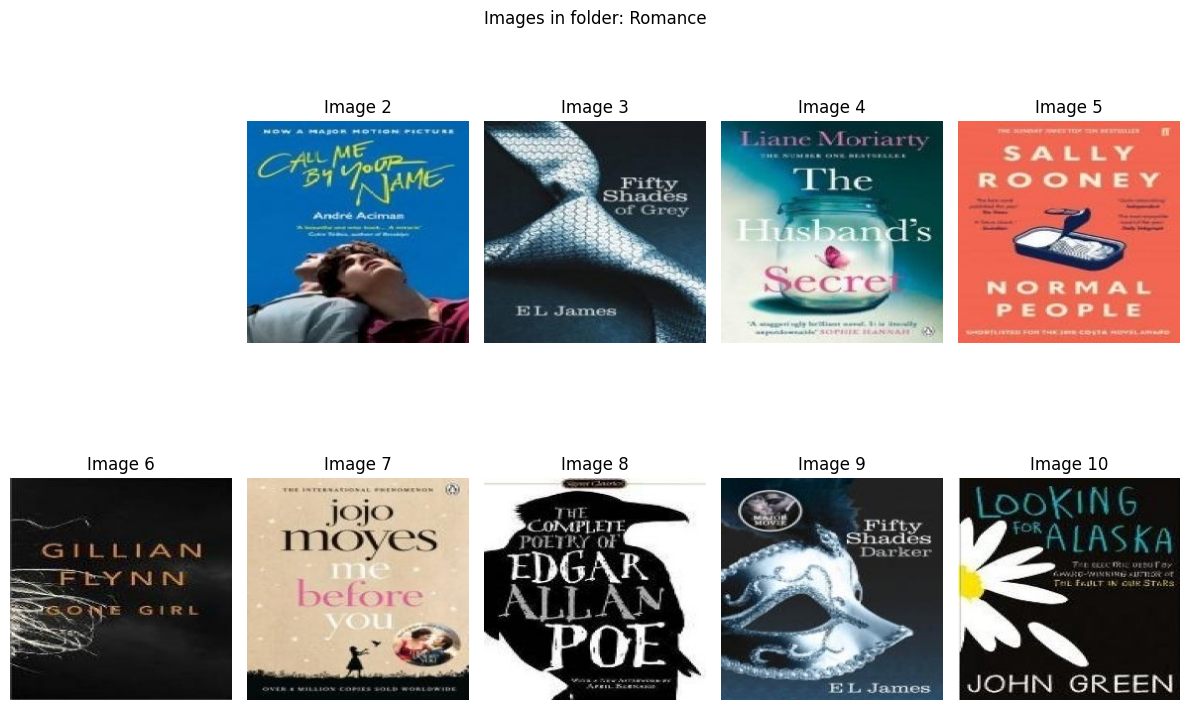

Images in folder: Teaching-Resources-Education
Error: Unable to read image .ipynb_checkpoints


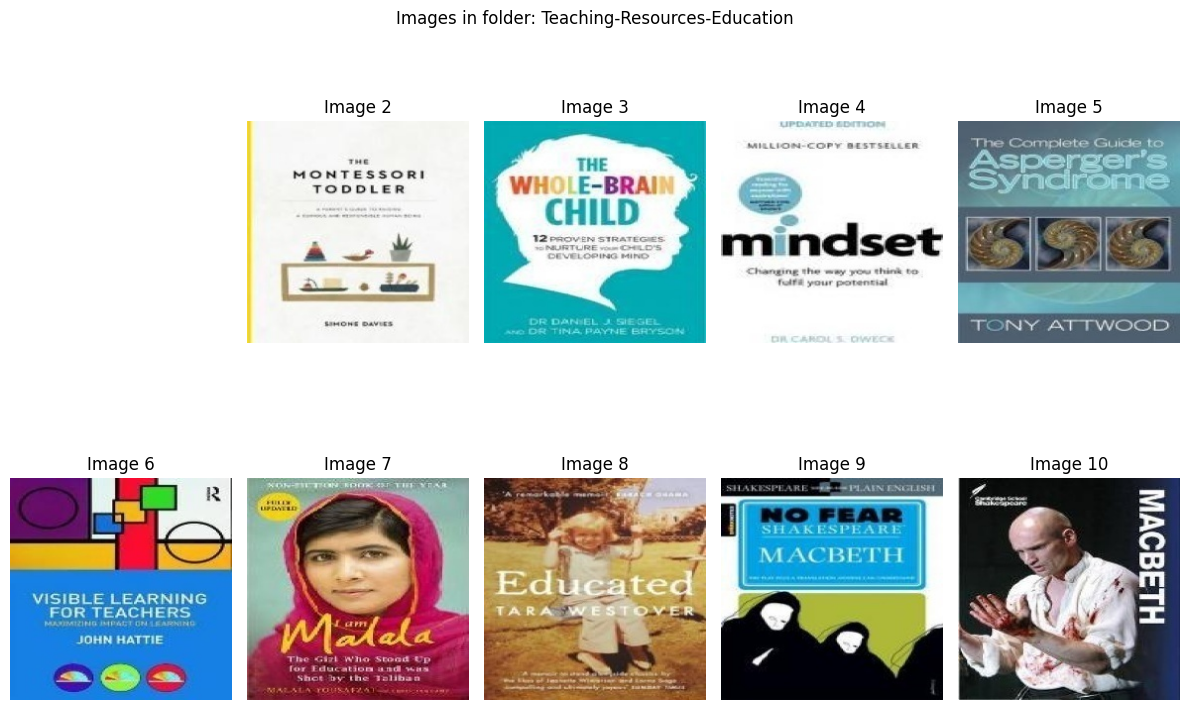

In [17]:
labels = ['Romance', 'Teaching-Resources-Education']
parent_folder = '/content/drive/MyDrive/deeplearning_dataset'

# Display images from each folder
for label in labels:
    folder_path = os.path.join(parent_folder, label)
    print(f"Images in folder: {label}")
    plt.figure(figsize=(12, 8))
    for i, filename in enumerate(os.listdir(folder_path)):
        if i >= 10:  # Show only 10 images per folder
            break
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Unable to read image {filename}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(2, 5, i+1)  # Display in a 2x5 grid
        plt.imshow(image)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.suptitle(f"Images in folder: {label}")
    plt.tight_layout()
    plt.show()


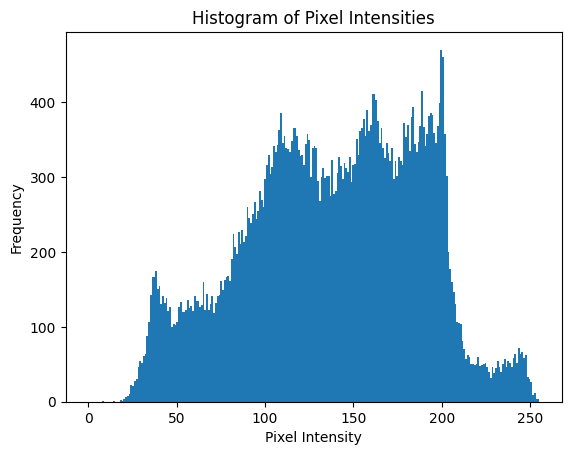

In [18]:
import cv2
import matplotlib.pyplot as plt

# File path of the image
image_path = r"/content/drive/MyDrive/deeplearning_dataset/Teaching-Resources-Education/0000001.jpg"

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load the image from '{image_path}'")
else:
    # Plot histogram
    plt.hist(image.ravel(), bins=256, range=(0, 255))
    plt.title('Histogram of Pixel Intensities')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


CNN MODEL


In [27]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Output layer with 2 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [29]:
# Train the model
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=10)


Epoch 1/10
6/6 [==============================] - 9s 354ms/step - loss: 2.2714 - accuracy: 0.4540 - val_loss: 0.6131 - val_accuracy: 0.6744
Epoch 2/10
6/6 [==============================] - 1s 89ms/step - loss: 0.6665 - accuracy: 0.6264 - val_loss: 0.6811 - val_accuracy: 0.6744
Epoch 3/10
6/6 [==============================] - 1s 86ms/step - loss: 0.6233 - accuracy: 0.6839 - val_loss: 0.6870 - val_accuracy: 0.6047
Epoch 4/10
6/6 [==============================] - 1s 87ms/step - loss: 0.5630 - accuracy: 0.7184 - val_loss: 0.5632 - val_accuracy: 0.6977
Epoch 5/10
6/6 [==============================] - 1s 83ms/step - loss: 0.5217 - accuracy: 0.7644 - val_loss: 0.6632 - val_accuracy: 0.7209
Epoch 6/10
6/6 [==============================] - 0s 74ms/step - loss: 0.4618 - accuracy: 0.7701 - val_loss: 0.5903 - val_accuracy: 0.6744
Epoch 7/10
6/6 [==============================] - 1s 103ms/step - loss: 0.3953 - accuracy: 0.8276 - val_loss: 0.6426 - val_accuracy: 0.6744
Epoch 8/10
6/6 [=========

In [30]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')


27/27 [==============================] - 2s 83ms/step - loss: 0.7278 - accuracy: 0.6825
Test accuracy: 0.6825029253959656


In [62]:
# Assuming you have an image for prediction
# image_for_prediction is a numpy array with shape (224, 224, 3) representing an RGB image

# Example image data (replace this with your actual image data)
image_for_prediction = np.random.rand(224, 224, 3)  # Example random image data

# Preprocess the image (rescale to [0, 1] and expand dimensions)
image_for_prediction = image_for_prediction.astype('float32') / 255.0
image_for_prediction = np.expand_dims(image_for_prediction, axis=0)

# Make prediction
prediction = model.predict(image_for_prediction)

# Get the predicted class label
predicted_class_index = np.argmax(prediction)


1/1 [==============================] - 0s 27ms/step


In [52]:
# Assuming you have made predictions and obtained predicted_class_index

# Define a dictionary mapping class indices to class names
class_names = {0: 'Romance', 1: 'Teaching-Resources-Education'}  # Update this with your actual class names

# Get the predicted class name
predicted_class_name = class_names.get(predicted_class_index, 'Unknown')

# Print the predicted class name
print(f'Predicted class name: {predicted_class_name}')


Predicted class name: Teaching-Resources-Education


In [61]:
image_path = "/content/drive/MyDrive/deeplearning_dataset/Romance/0000002.jpg"  # Replace with the path to your image file
predicted_class = predict_class(model, image_path, class_names)
print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 0s 25ms/step
Predicted class: Teaching-Resources-Education


RNN

In [38]:
print(train_images.shape)


(32, 224, 224, 3)


In [42]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Assume you have loaded or prepared image data and corresponding labels
# train_images, train_labels, test_images, test_labels

# Compute the number of classes
num_classes = len(np.unique(train_labels))

# Load pre-trained CNN (VGG16) without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using the CNN model
train_features = base_model.predict(train_images)
test_features = base_model.predict(test_images)

# Reshape features
train_features_reshaped = train_features.reshape(train_features.shape[0], -1, train_features.shape[3])
test_features_reshaped = test_features.reshape(test_features.shape[0], -1, test_features.shape[3])

# Define RNN model
rnn_model = Sequential([
    LSTM(256, input_shape=(train_features_reshaped.shape[1], train_features_reshaped.shape[2])),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer with number of classes
])

# Compile the RNN model
rnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_model.fit(train_features_reshaped, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = rnn_model.evaluate(test_features_reshaped, test_labels)
print(f'Test accuracy: {test_acc}')


1/1 [==============================] - 0s 34ms/step
Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.8059 - accuracy: 0.4400 - val_loss: 1.1411 - val_accuracy: 0.5714
Epoch 2/10
1/1 [==============================] - 0s 46ms/step - loss: 0.7049 - accuracy: 0.7200 - val_loss: 0.9950 - val_accuracy: 0.5714
Epoch 3/10
1/1 [==============================] - 0s 45ms/step - loss: 0.6083 - accuracy: 0.7200 - val_loss: 0.7070 - val_accuracy: 0.5714
Epoch 4/10
1/1 [==============================] - 0s 62ms/step - loss: 0.4460 - accuracy: 0.8000 - val_loss: 0.5977 - val_accuracy: 0.7143
Epoch 5/10
1/1 [==============================] - 0s 60ms/step - loss: 0.5085 - accuracy: 0.8000 - val_loss: 0.5689 - val_accuracy: 0.7143
Epoch 6/10
1/1 [==============================] - 0s 54ms/step - loss: 0.4772 - accuracy: 0.7600 - val_loss: 0.5860 - val_accuracy: 0.5714
Epoch 7/10
1/1 [==============================] - 0s 45ms/step - loss: 0.3399 - accuracy: 0.8800 - val_loss: 0.7266 

In [46]:
rnn_model = Sequential([
    LSTM(256, input_shape=(train_features_reshaped.shape[1], train_features_reshaped.shape[2])),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer with number of classes
])

# Compile the RNN model
rnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_model.fit(train_features_reshaped, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = rnn_model.evaluate(test_features_reshaped, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.6928 - accuracy: 0.5600 - val_loss: 1.2065 - val_accuracy: 0.5714
Epoch 2/10
1/1 [==============================] - 0s 73ms/step - loss: 0.7834 - accuracy: 0.7200 - val_loss: 1.0971 - val_accuracy: 0.5714
Epoch 3/10
1/1 [==============================] - 0s 56ms/step - loss: 0.7820 - accuracy: 0.7200 - val_loss: 0.7975 - val_accuracy: 0.5714
Epoch 4/10
1/1 [==============================] - 0s 56ms/step - loss: 0.6537 - accuracy: 0.7200 - val_loss: 0.6483 - val_accuracy: 0.7143
Epoch 5/10
1/1 [==============================] - 0s 56ms/step - loss: 0.6177 - accuracy: 0.7600 - val_loss: 0.6297 - val_accuracy: 0.7143
Epoch 6/10
1/1 [==============================] - 0s 69ms/step - loss: 0.6171 - accuracy: 0.6800 - val_loss: 0.6233 - val_accuracy: 0.7143
Epoch 7/10
1/1 [==============================] - 0s 58ms/step - loss: 0.7984 - accuracy: 0.5200 - val_loss: 0.6266 - val_accuracy: 0.7143
Epoch 8/10
1/1 [=============

In [43]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Assume you have loaded or prepared image data and corresponding labels
# train_images, train_labels, test_images, test_labels

# Compute the number of classes
num_classes = len(np.unique(train_labels))

# Load pre-trained CNN (VGG16) without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using the CNN model
train_features = base_model.predict(train_images)
test_features = base_model.predict(test_images)

# Reshape features
train_features_reshaped = train_features.reshape(train_features.shape[0], -1, train_features.shape[3])
test_features_reshaped = test_features.reshape(test_features.shape[0], -1, test_features.shape[3])

# Define RNN model
rnn_model = Sequential([
    LSTM(256, input_shape=(train_features_reshaped.shape[1], train_features_reshaped.shape[2])),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer with number of classes
])

# Compile the RNN model
rnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train the RNN model
history = rnn_model.fit(train_features_reshaped, train_labels, epochs=20, batch_size=32,
                        validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
test_loss, test_acc = rnn_model.evaluate(test_features_reshaped, test_labels)
print(f'Test accuracy: {test_acc}')


1/1 [==============================] - 0s 39ms/step
Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.7319 - accuracy: 0.4400 - val_loss: 1.1643 - val_accuracy: 0.5714
Epoch 2/20
1/1 [==============================] - 0s 49ms/step - loss: 0.7575 - accuracy: 0.7200 - val_loss: 1.1134 - val_accuracy: 0.5714
Epoch 3/20
1/1 [==============================] - 0s 49ms/step - loss: 0.7310 - accuracy: 0.7200 - val_loss: 0.8768 - val_accuracy: 0.5714
Epoch 4/20
1/1 [==============================] - ETA: 0s - loss: 0.5322 - accuracy: 0.7600

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 63ms/step - loss: 0.5322 - accuracy: 0.7600 - val_loss: 0.6816 - val_accuracy: 0.5714
Epoch 5/20
1/1 [==============================] - 0s 49ms/step - loss: 0.4033 - accuracy: 0.8400 - val_loss: 0.5964 - val_accuracy: 0.5714
Epoch 6/20
1/1 [==============================] - 0s 79ms/step - loss: 0.4621 - accuracy: 0.7600 - val_loss: 0.5745 - val_accuracy: 0.7143
Epoch 7/20
1/1 [==============================] - 0s 51ms/step - loss: 0.4655 - accuracy: 0.8800 - val_loss: 0.5612 - val_accuracy: 0.7143
Epoch 8/20
1/1 [==============================] - 0s 47ms/step - loss: 0.4588 - accuracy: 0.8400 - val_loss: 0.5719 - val_accuracy: 0.5714
Epoch 9/20
1/1 [==============================] - 0s 46ms/step - loss: 0.4011 - accuracy: 0.8400 - val_loss: 0.6366 - val_accuracy: 0.5714
Epoch 10/20
1/1 [==============================] - 0s 31ms/step - loss: 0.7266 - accuracy: 0.5000
Test accuracy: 0.5


ResNets

In [45]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 model pre-trained on ImageNet data
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the ResNet model
for layer in resnet_model.layers:
    layer.trainable = False

# Add custom top layers for classification
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Assuming num_classes is defined

# Create a new model combining ResNet base and custom top layers
model = Model(inputs=resnet_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=10, validation_data=val_data)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
6/6 [==============================] - 11s 1s/step - loss: 0.9313 - accuracy: 0.6322 - val_loss: 1.0099 - val_accuracy: 0.6744
Epoch 2/10
6/6 [==============================] - 1s 151ms/step - loss: 0.9562 - accuracy: 0.5977 - val_loss: 0.9485 - val_accuracy: 0.3256
Epoch 3/10
6/6 [==============================] - 1s 149ms/step - loss: 0.7275 - accuracy: 0.6264 - val_loss: 0.6081 - val_accuracy: 0.6512
Epoch 4/10
6/6 [==============================] - 1s 145ms/step - loss: 0.6734 - accuracy: 0.6437 - val_loss: 0.6924 - val_accuracy: 0.6512
Epoch 5/10
6/6 [==============================] - 1s 149ms/step - loss: 0.6332 - accuracy: 0.6724 - val_loss: 0.7560 - val_accuracy: 0.5116
Epoch 6/10
6/6 [==============================] - 1s 149ms/step - loss: 0.5790 - accuracy: 0.7184 - val_loss: 0.6881 - val_accuracy: 0.6512
Epoch 7/10
6/6 [==============================] - 1s 145ms/step - loss: 0.6074 - accuracy: 0.6782 - val_loss: 0.6389 - val_accuracy: 0.6744
Epoch 8/10
6/6 [======